In [1]:
### https://www.data.gouv.fr/fr/datasets/r/08c18e08-6780-452d-9b8c-ae244ad529b3

In [2]:
import matplotlib.pyplot as plt
from datetime import timedelta, date
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
covid_url = ("https://www.data.gouv.fr/fr/datasets/r/08c18e08-6780-452d-9b8c-ae244ad529b3")

In [4]:
STUDY_DAYS = 30

In [5]:
df = pd.read_csv(covid_url, sep=";", parse_dates=True, index_col=2)
df

,reg,cl_age90,hosp,rea,rad,dc
jour,,,,,,
2020-03-18,1,0,0,0,0,0
2020-03-18,1,9,0,0,0,0
2020-03-18,1,19,0,0,0,0
2020-03-18,1,29,0,0,0,0
2020-03-18,1,39,0,0,0,0
...,...,...,...,...,...,...
2021-02-18,94,59,6,0,88,6
2021-02-18,94,69,13,4,110,15
2021-02-18,94,79,21,2,131,37


In [6]:
df.cl_age90.unique()

array([ 0,  9, 19, 29, 39, 49, 59, 69, 79, 89, 90])

In [7]:
df.reg.unique().shape

(18,)

In [8]:
df.loc[(df.cl_age90 < 70),  'AgeGroup'] = 'Midlle age'
df.loc[(df.cl_age90 < 40),  'AgeGroup'] = 'Adult'
df.loc[(df.cl_age90 < 20),  'AgeGroup'] = 'Teen'
df.loc[(df.cl_age90 < 10),  'AgeGroup'] = 'Kid'
df.loc[(df.cl_age90 <= 1),  'AgeGroup'] = 'Infant'
df.loc[(df.cl_age90 >= 70),  'AgeGroup'] = 'Elderly'
df

,reg,cl_age90,hosp,rea,rad,dc,AgeGroup
jour,,,,,,,
2020-03-18,1,0,0,0,0,0,Infant
2020-03-18,1,9,0,0,0,0,Kid
2020-03-18,1,19,0,0,0,0,Teen
2020-03-18,1,29,0,0,0,0,Adult
2020-03-18,1,39,0,0,0,0,Adult
...,...,...,...,...,...,...,...
2021-02-18,94,59,6,0,88,6,Midlle age
2021-02-18,94,69,13,4,110,15,Midlle age
2021-02-18,94,79,21,2,131,37,Elderly


In [9]:
df.AgeGroup.unique()

array(['Infant', 'Kid', 'Teen', 'Adult', 'Midlle age', 'Elderly'],
      dtype=object)

In [10]:
df.drop(columns=["cl_age90"], inplace=True)
df.drop(columns=["reg"], inplace=True)
df

,hosp,rea,rad,dc,AgeGroup
jour,,,,,
2020-03-18,0,0,0,0,Infant
2020-03-18,0,0,0,0,Kid
2020-03-18,0,0,0,0,Teen
2020-03-18,0,0,0,0,Adult
2020-03-18,0,0,0,0,Adult
...,...,...,...,...,...
2021-02-18,6,0,88,6,Midlle age
2021-02-18,13,4,110,15,Midlle age
2021-02-18,21,2,131,37,Elderly


In [11]:
df.groupby(['AgeGroup']).sum()

,hosp,rea,rad,dc
AgeGroup,,,,
Adult,171739,26033,3422538,43414
Elderly,3917640,328805,17510449,7193139
Infant,5849161,790089,36648022,8709023
Kid,15199,2570,374190,992
Midlle age,1680199,423471,14749033,1420626
Teen,17387,2720,327785,1359


In [12]:
last_day = df.tail(1).index[0]
before_day = last_day - timedelta(days = STUDY_DAYS)
print("Evolution from ", before_day, " to ", last_day)

sdf = df.loc[last_day]
pdf = df.loc[before_day]
sdf.reset_index(inplace=True)
pdf.reset_index(inplace=True)

sdf, pdf

Evolution from  2021-01-19 00:00:00  to  2021-02-18 00:00:00


(          jour  hosp  rea  rad   dc    AgeGroup
 0   2021-02-18    31    5  826  175      Infant
 1   2021-02-18     0    0   21    0         Kid
 2   2021-02-18     0    0    9    0        Teen
 3   2021-02-18     0    0   20    0       Adult
 4   2021-02-18     0    0   61    2       Adult
 ..         ...   ...  ...  ...  ...         ...
 193 2021-02-18     6    0   88    6  Midlle age
 194 2021-02-18    13    4  110   15  Midlle age
 195 2021-02-18    21    2  131   37     Elderly
 196 2021-02-18    34    1  119   55     Elderly
 197 2021-02-18    21    1   43   26     Elderly
 
 [198 rows x 6 columns],
           jour  hosp  rea  rad   dc    AgeGroup
 0   2021-01-19    54    5  776  169      Infant
 1   2021-01-19     0    0   21    0         Kid
 2   2021-01-19     0    0    9    0        Teen
 3   2021-01-19     0    0   20    0       Adult
 4   2021-01-19     0    0   59    2       Adult
 ..         ...   ...  ...  ...  ...         ...
 193 2021-01-19     1    0   84    5  Midl

In [13]:
sdf = sdf.groupby(['AgeGroup']).sum()
sdf

,hosp,rea,rad,dc
AgeGroup,,,,
Adult,651,108,20374,217
Elderly,18095,1469,129015,50048
Infant,25717,3384,247096,59133
Kid,32,5,2154,4
Midlle age,6693,1763,91224,8533
Teen,59,7,2306,7


In [14]:
pdf = pdf.groupby(['AgeGroup']).sum()
pdf

,hosp,rea,rad,dc
AgeGroup,,,,
Adult,571,69,18164,195
Elderly,18664,1342,108192,41830
Infant,25532,2829,211785,49670
Kid,25,2,1982,4
Midlle age,5979,1380,79780,7358
Teen,74,7,2022,6


In [15]:
sdf.index.values

array(['Adult', 'Elderly', 'Infant', 'Kid', 'Midlle age', 'Teen'],
      dtype=object)

In [16]:
frame = {"prev_hosp": pdf["hosp"], "lastest_hosp": sdf["hosp"]}
frame

{'prev_hosp': AgeGroup
 Adult           571
 Elderly       18664
 Infant        25532
 Kid              25
 Midlle age     5979
 Teen             74
 Name: hosp, dtype: int64,
 'lastest_hosp': AgeGroup
 Adult           651
 Elderly       18095
 Infant        25717
 Kid              32
 Midlle age     6693
 Teen             59
 Name: hosp, dtype: int64}

In [17]:
stats = pd.DataFrame(frame)
stats

,prev_hosp,lastest_hosp
AgeGroup,,
Adult,571,651
Elderly,18664,18095
Infant,25532,25717
Kid,25,32
Midlle age,5979,6693
Teen,74,59


In [18]:
x = np.arange(len(stats.index))  
width = 0.35
x

array([0, 1, 2, 3, 4, 5])

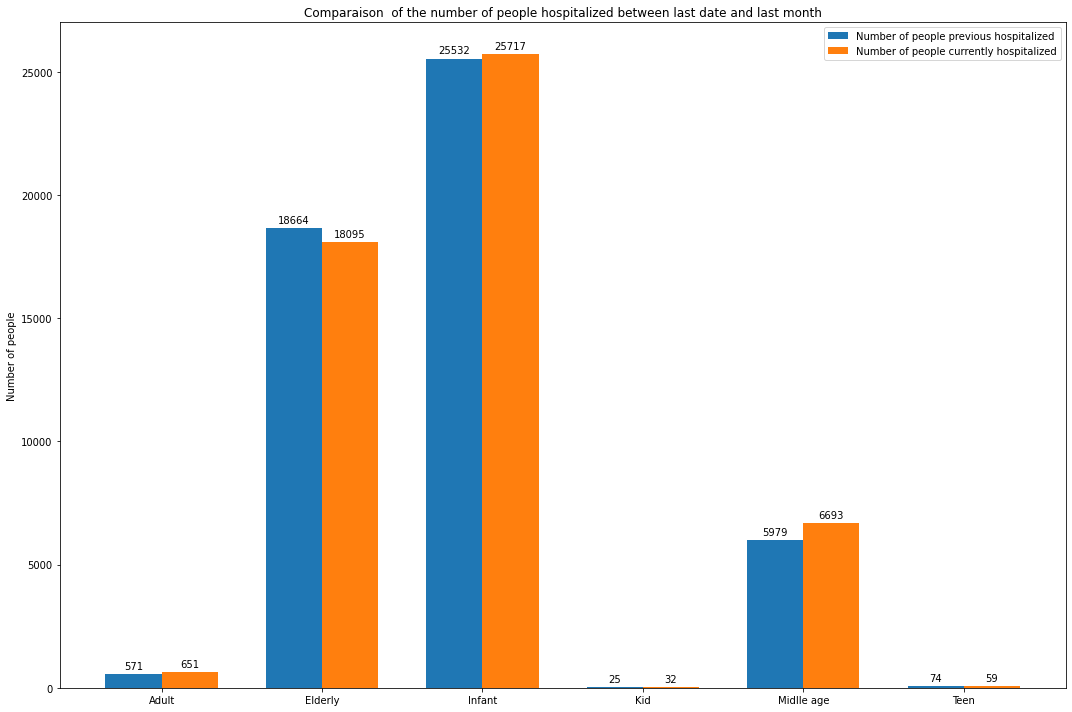

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, stats.prev_hosp, width, label='Number of people previous hospitalized')
rects2 = ax.bar(x + width/2, stats.lastest_hosp, width, label='Number of people currently hospitalized')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of people')
ax.set_title('Comparaison  of the number of people hospitalized between last date and last month')
#ax.set_xticks(stats.index)
# ax.set_xticklabels(stats.index)
ax.set_xticklabels(('', 'Adult', 'Elderly', 'Infant', 'Kid', 'Midlle age', 'Teen'))
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.savefig('EvolutionHospitalizationsAge.png')
plt.show()

In [20]:
df

,hosp,rea,rad,dc,AgeGroup
jour,,,,,
2020-03-18,0,0,0,0,Infant
2020-03-18,0,0,0,0,Kid
2020-03-18,0,0,0,0,Teen
2020-03-18,0,0,0,0,Adult
2020-03-18,0,0,0,0,Adult
...,...,...,...,...,...
2021-02-18,6,0,88,6,Midlle age
2021-02-18,13,4,110,15,Midlle age
2021-02-18,21,2,131,37,Elderly


In [21]:
df.index.name = 'Date'
gdf = df.groupby(['Date', 'AgeGroup']).sum().sort_values(ascending=True, by='Date')
gdf

hosp   rea     rad     dc
Date       AgeGroup                              
2020-03-18 Adult         162    33     165      2
           Elderly      1511   320     180    188
           Infant       2972   771     816    218
           Kid            20     2      49      0
           Midlle age   1192   405     387     26
...                      ...   ...     ...    ...
2021-02-18 Adult         651   108   20374    217
           Elderly     18095  1469  129015  50048
           Infant      25717  3384  247096  59133
           Kid            32     5    2154      4
           Teen           59     7    2306      7

[2028 rows x 4 columns]

In [22]:
L = gdf.query('AgeGroup == "Adult"')
L = L.reset_index(level=1)
L.drop(columns=["AgeGroup"], inplace=True)
L

,hosp,rea,rad,dc
Date,,,,
2020-03-18,162,33,165,2
2020-03-19,234,49,262,3
2020-03-20,289,65,324,2
2020-03-21,327,78,381,2
2020-03-22,393,89,434,3
...,...,...,...,...
2021-02-14,621,100,20028,215
2021-02-15,644,108,20088,215
2021-02-16,636,106,20199,216


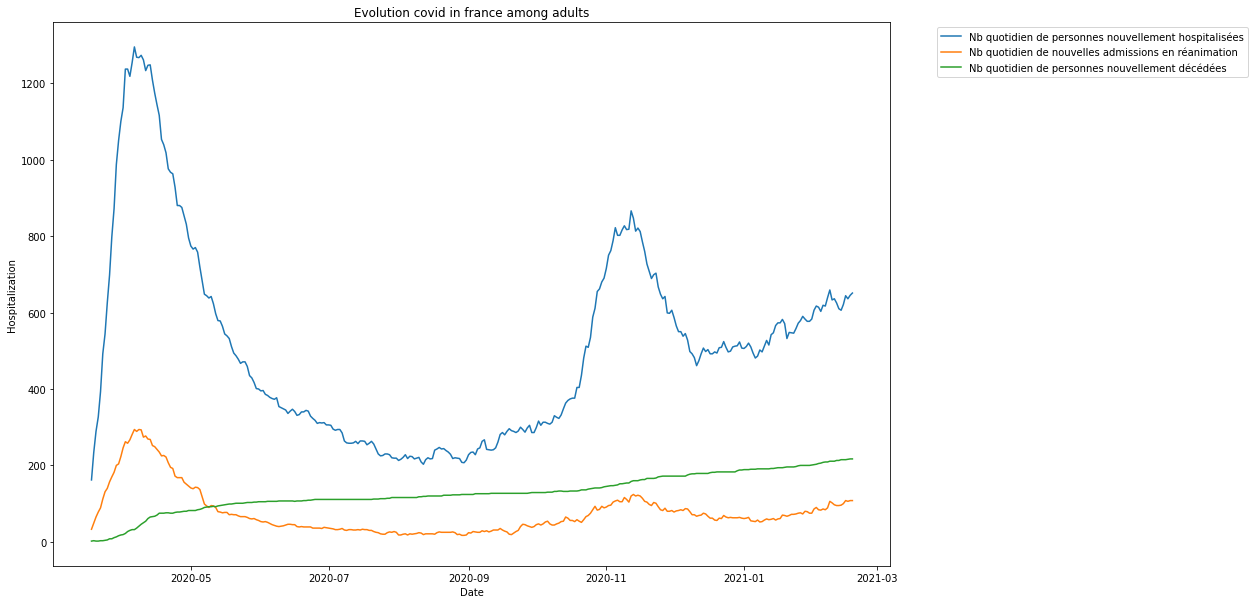

In [23]:
plt.figure(figsize=(15, 10))
plt.title('Evolution covid in france among adults')
plt.xlabel('Date')
plt.ylabel('Hospitalization')
plt.plot(L[['hosp', 'rea', 'dc']])
plt.legend(['Nb quotidien de personnes nouvellement hospitalisées', 'Nb quotidien de nouvelles admissions en réanimation', 'Nb quotidien de personnes nouvellement décédées'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('EvolutionCovidAdults.png',bbox_inches = 'tight')
plt.show()

In [24]:
gdf

hosp   rea     rad     dc
Date       AgeGroup                              
2020-03-18 Adult         162    33     165      2
           Elderly      1511   320     180    188
           Infant       2972   771     816    218
           Kid            20     2      49      0
           Midlle age   1192   405     387     26
...                      ...   ...     ...    ...
2021-02-18 Adult         651   108   20374    217
           Elderly     18095  1469  129015  50048
           Infant      25717  3384  247096  59133
           Kid            32     5    2154      4
           Teen           59     7    2306      7

[2028 rows x 4 columns]

In [25]:
LElderly = gdf.query('AgeGroup == "Elderly"')
LElderly = LElderly.reset_index(level=1)
LElderly.drop(columns=["AgeGroup", "rad"], inplace=True)
LElderly

,hosp,rea,dc
Date,,,
2020-03-18,1511,320,188
2020-03-19,2345,456,314
2020-03-20,2693,508,385
2020-03-21,3213,602,480
2020-03-22,3725,679,573
...,...,...,...
2021-02-14,18706,1502,48909
2021-02-15,18703,1513,49256
2021-02-16,18495,1469,49552


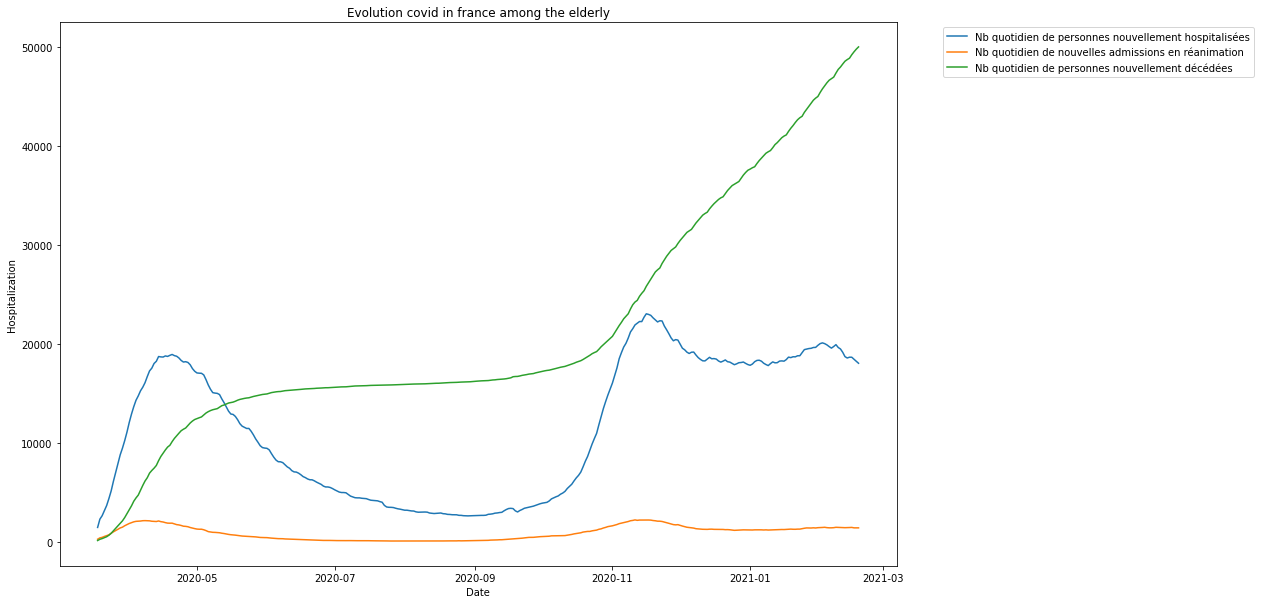

In [26]:
plt.figure(figsize=(15, 10))
plt.title('Evolution covid in france among the elderly')
plt.xlabel('Date')
plt.ylabel('Hospitalization')
plt.plot(LElderly[['hosp', 'rea', 'dc']])
plt.legend(['Nb quotidien de personnes nouvellement hospitalisées', 'Nb quotidien de nouvelles admissions en réanimation', 'Nb quotidien de personnes nouvellement décédées'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('EvolutionCovidElderly.png',bbox_inches = 'tight')
plt.show()

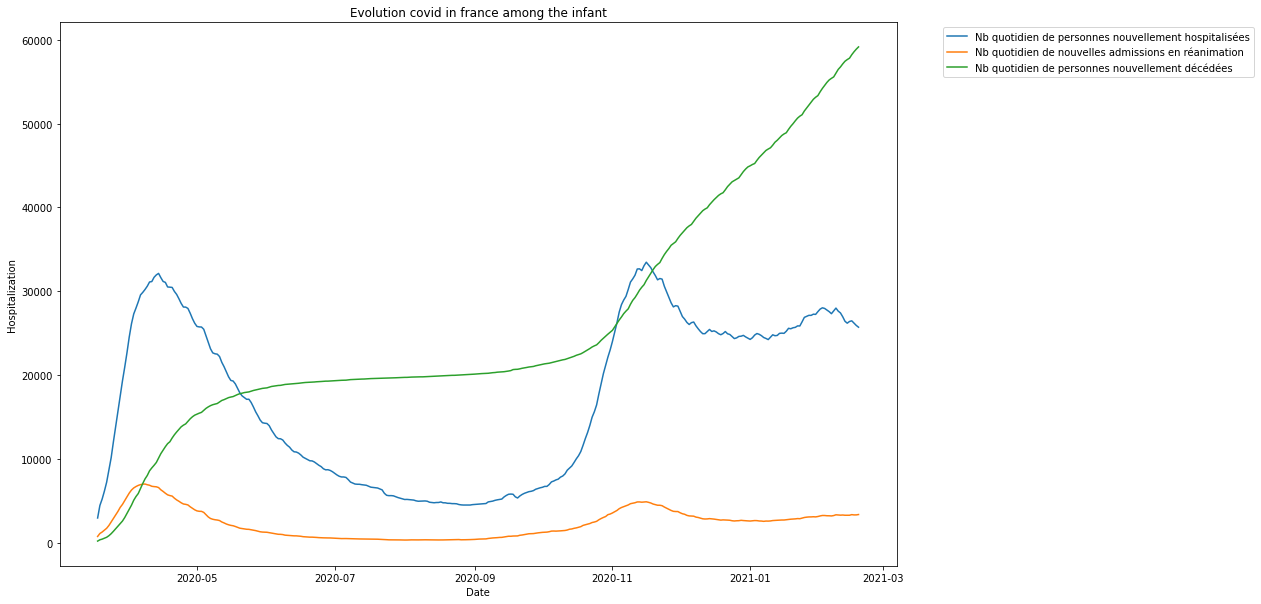

In [27]:
LInfant = gdf.query('AgeGroup == "Infant"')
LInfant = LInfant.reset_index(level=1)
LInfant.drop(columns=["AgeGroup", "rad"], inplace=True)

plt.figure(figsize=(15, 10))
plt.title('Evolution covid in france among the infant')
plt.xlabel('Date')
plt.ylabel('Hospitalization')
plt.plot(LInfant[['hosp', 'rea', 'dc']])
plt.legend(['Nb quotidien de personnes nouvellement hospitalisées', 'Nb quotidien de nouvelles admissions en réanimation', 'Nb quotidien de personnes nouvellement décédées'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('EvolutionCovidLInfant.png',bbox_inches = 'tight')
plt.show()

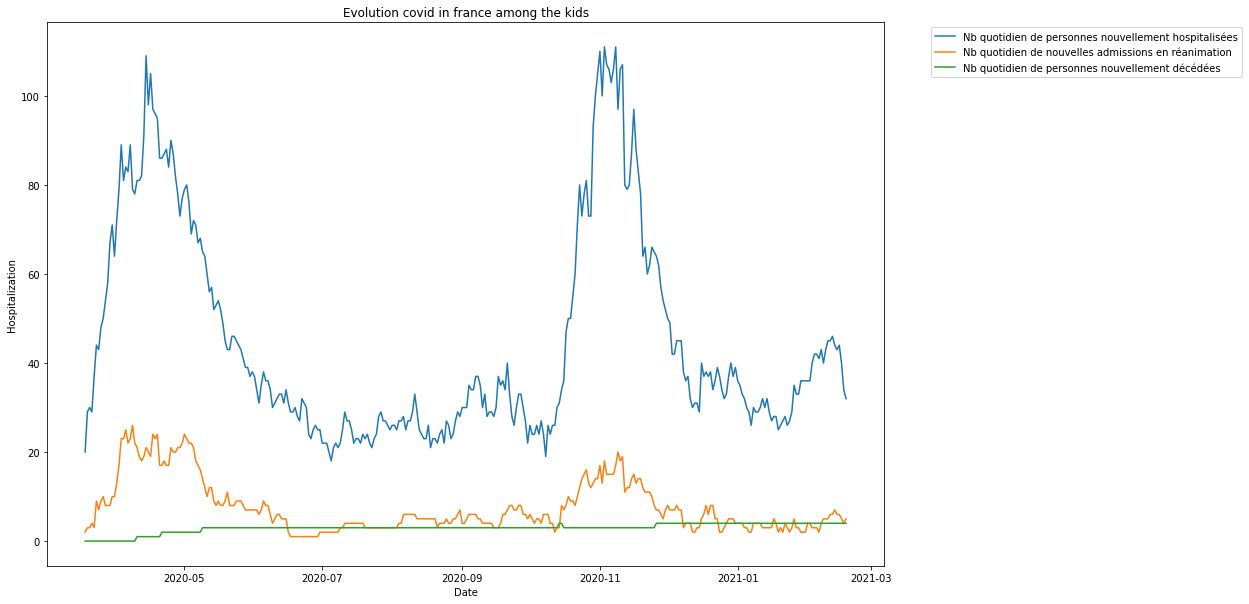

In [28]:
LKid = gdf.query('AgeGroup == "Kid"')
LKid = LKid.reset_index(level=1)
LKid.drop(columns=["AgeGroup", "rad"], inplace=True)

plt.figure(figsize=(15, 10))
plt.title('Evolution covid in france among the kids')
plt.xlabel('Date')
plt.ylabel('Hospitalization')
plt.plot(LKid[['hosp', 'rea', 'dc']])
plt.legend(['Nb quotidien de personnes nouvellement hospitalisées', 'Nb quotidien de nouvelles admissions en réanimation', 'Nb quotidien de personnes nouvellement décédées'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('EvolutionCovidLKid.png',bbox_inches = 'tight')
plt.show()

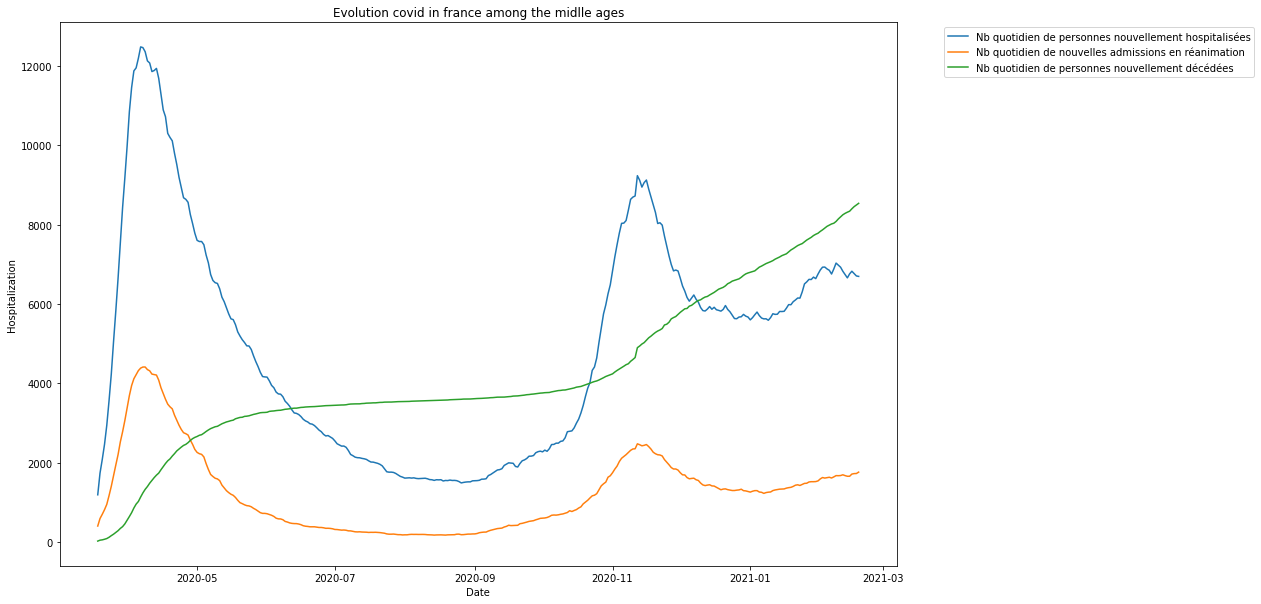

In [29]:
LMidlleAge = gdf.query('AgeGroup == "Midlle age"')
LMidlleAge = LMidlleAge.reset_index(level=1)
LMidlleAge.drop(columns=["AgeGroup", "rad"], inplace=True)

plt.figure(figsize=(15, 10))
plt.title('Evolution covid in france among the midlle ages')
plt.xlabel('Date')
plt.ylabel('Hospitalization')
plt.plot(LMidlleAge[['hosp', 'rea', 'dc']])
plt.legend(['Nb quotidien de personnes nouvellement hospitalisées', 'Nb quotidien de nouvelles admissions en réanimation', 'Nb quotidien de personnes nouvellement décédées'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('EvolutionCovidLMidlleAge.png',bbox_inches = 'tight')
plt.show()

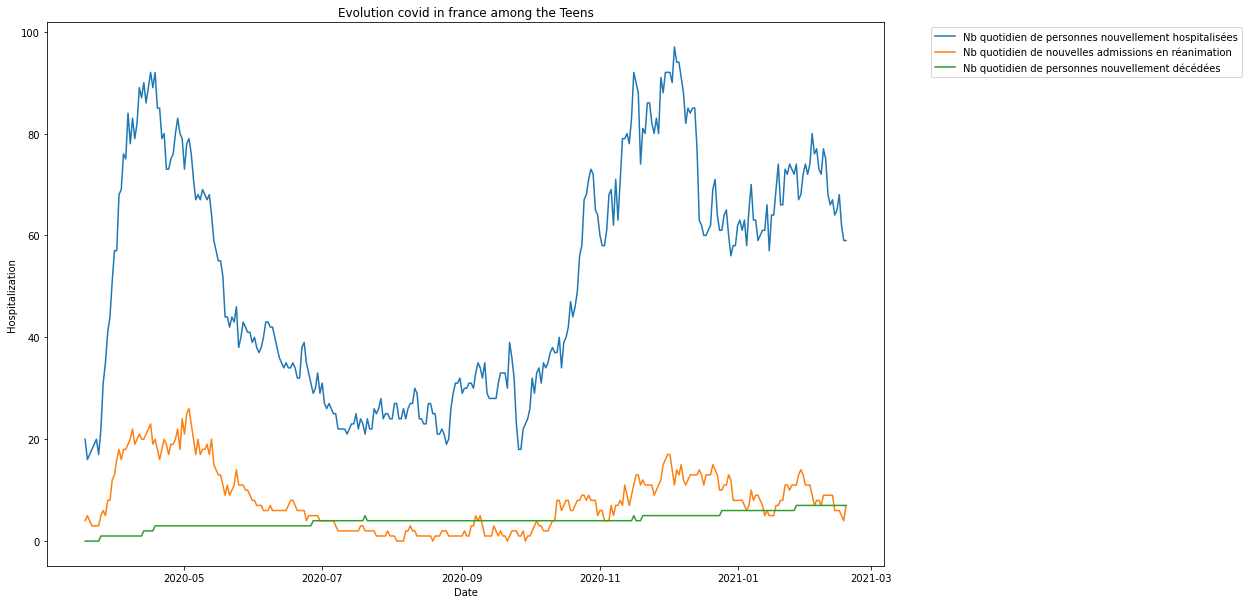

In [30]:
LTeen = gdf.query('AgeGroup == "Teen"')
LTeen = LTeen.reset_index(level=1)
LTeen.drop(columns=["AgeGroup", "rad"], inplace=True)

plt.figure(figsize=(15, 10))
plt.title('Evolution covid in france among the Teens')
plt.xlabel('Date')
plt.ylabel('Hospitalization')
plt.plot(LTeen[['hosp', 'rea', 'dc']])
plt.legend(['Nb quotidien de personnes nouvellement hospitalisées', 'Nb quotidien de nouvelles admissions en réanimation', 'Nb quotidien de personnes nouvellement décédées'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('EvolutionCovidLTeen.png',bbox_inches = 'tight')
plt.show()